In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import sys

count_plot_limit = 50

sys.path.append('../')

from src import CLEAN_PATENTS_PATH, CITATIONS_PATH
from src import TEXT_EMBEDDING_PATH
from src.data import PatentsDataset
from src.models.similarities import *

%matplotlib inline

INFO:transformers.file_utils:PyTorch version 1.4.0 available.


In [2]:
patents = PatentsDataset(CLEAN_PATENTS_PATH, 
                         ipc_tags_format='list', 
                         clean_df=False,  
                         join_citations=False)

INFO:root:Start reading data.
INFO:root:Read /Users/valik/LMU/patent-similarity-siemens/data/patents-clean.csv. Number of patents: 6,881,033.
INFO:root:Skip cleaning.


### Abstracts

In [3]:
abstract_lengths = patents.patents.abstract.apply(len)

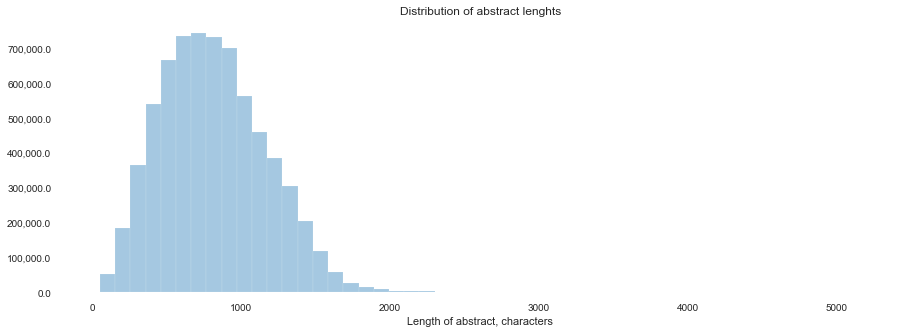

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.distplot(abstract_lengths[(abstract_lengths < abstract_lengths.quantile(0.9999)) &\
                              (abstract_lengths > abstract_lengths.quantile(0.0001))], 
             norm_hist=False, kde=False)
plt.xlabel('Length of abstract, characters')
plt.title('Distribution of abstract lenghts')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,}"))
plt.savefig('../reports/figures/abstract_lenghts_dist.png', dpi = 300)

### Titles

In [5]:
title_lengths = patents.patents.title.apply(len)

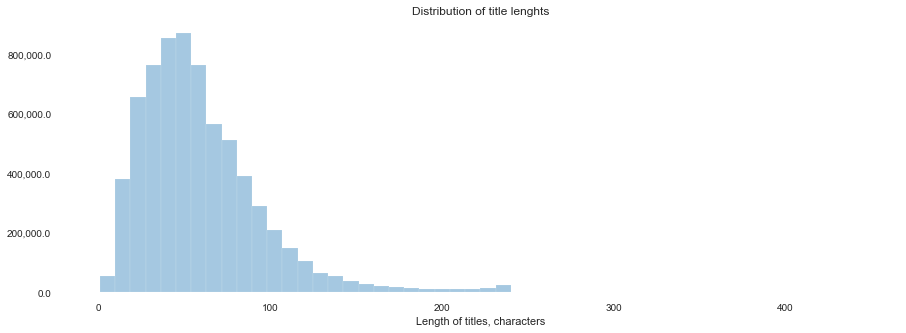

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.distplot(title_lengths[(title_lengths < title_lengths.quantile(0.99999))], norm_hist=False, kde=False)
plt.xlabel('Length of titles, characters')
plt.title('Distribution of title lenghts')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,}"))
plt.savefig('../reports/figures/title_lenghts_dist.png', dpi = 300)

### Dates

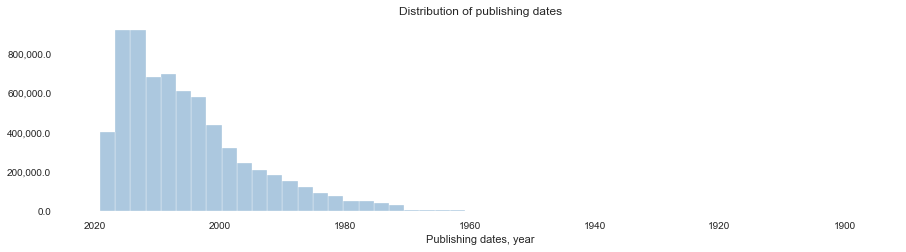

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3.5))
patents.patents.date.hist(bins=50, color=(172/255, 200/255, 223/255))
ax.grid(False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,}"))
plt.xlabel('Publishing dates, year')
plt.title('Distribution of publishing dates')
plt.gca().invert_xaxis()
plt.savefig('../reports/figures/date_dist.png', dpi = 300)

In [18]:
patents.patents.date.describe()

count                 6881033
unique                  21232
top       2015-03-25 00:00:00
freq                    12005
first     1897-05-22 00:00:00
last      2019-02-27 00:00:00
Name: date, dtype: object